# Import and Load

In [1]:
# Data Analysis #
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re

# Graphics #
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
#import geopandas
#from shapely.geometry import Point
%matplotlib inline


# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Set default font size
#plt.rcParams['font.size'] = 24

# ML packages #

# Splitting data into training and testing

In [3]:
# Data #
tag = 'Healthy_Aging_Data.csv'
raw_df = pd.read_csv(tag)
raw_df.sample(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ClassID,TopicID,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
37177,2016,2016,OR,Oregon,BRFSS,Overall Health,Self-rated health (good to excellent health),Percentage of older adults who self-reported t...,NaN,%,PRCTG,Percentage,81.3,NaN,NaN,NaN,76.8,85.0,NaN,Age Group,55-59 years,NaN,NaN,NaN,NaN,"(44.56744942400047, -120.15503132599969)",C01,TOC08,Q33,NaN,41,AGE,5559,NaN,NaN,NaN,NaN,NaN
36646,2016,2016,KS,Kansas,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,NaN,%,PRCTG,Percentage,NaN,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,NaN,Age Group,50-54 years,NaN,NaN,NaN,NaN,"(38.34774030000045, -98.20078122699965)",C06,TCC04,Q42,NaN,20,AGE,5054,NaN,NaN,NaN,NaN,NaN
415,2014,2014,SD,South Dakota,BRFSS,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,NaN,%,PRCTG,Percentage,12.8,NaN,NaN,NaN,9.3,17.5,NaN,Age Group,55-59 years,NaN,NaN,NaN,NaN,"(44.353130053000484, -100.3735306369997)",C01,TOC06,Q05,NaN,46,AGE,5559,NaN,NaN,NaN,NaN,NaN
26121,2015,2015,WA,Washington,BRFSS,Screenings and Vaccines,Pap test within past 3 years,Percentage of older adult women with an intact...,NaN,%,PRCTG,Percentage,49.5,NaN,NaN,NaN,46.2,52.8,NaN,Age Group,65 years or older,NaN,NaN,NaN,NaN,"(47.52227862900048, -120.47001078999972)",C03,TSC03,Q20,NaN,53,AGE,65PLUS,NaN,NaN,NaN,NaN,NaN
36967,2016,2016,CO,Colorado,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,NaN,%,PRCTG,Percentage,18.2,NaN,NaN,NaN,16.1,20.5,NaN,Age Group,60-64 years,NaN,NaN,NaN,NaN,"(38.843840757000464, -106.13361092099967)",C01,TOC07,Q32,NaN,8,AGE,6064,NaN,NaN,NaN,NaN,NaN


# Data Cleaning and Transforming

>For the sake of this project, only patients with Cognitive Decline problems will be extracted from the data. This information lie under Class column of dataset. `cognitive_df` will represent the partial data that has aforementioned property. 

>The `dataframe.info` method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values.

>After checking out df.info() function, it is better to drop empty columns. 

>Data Value and its unit is important when statistical analysis is to be employed. We have to make sure units and types are consistent. To check that we will have to investigate columns that have numerical values except year columns.

## Filter by Disease/Diagnosis

In [4]:
raw_df['Question'].unique()

array(['Percentage of older adults who report having a disability',
       'Percentage of older adults who are experiencing frequent mental distress',
       'Percentage of older adults who have fallen and sustained an injury within last year',
       'Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease',
       'Percentage of older adults with a lifetime diagnosis of depression',
       'Physically unhealthy days (mean number of days in past month)',
       'Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine',
       'Percentage of older adults who reported binge drinking within the past 30 days',
       'Percentage of older adults getting sufficient sleep (>6 hours)',
       'Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more',
       'Percentage of older adult men who are up to date with select clinical preventive ser

>Cognitive decline is reported under two main categories one that is from the patient-self and the other the care giver to the person with cognitive illness. Since we are not given if these are the same or distinct patients in these two class, to prevent overlapping we go with only one class which is here being Cognitive class.

In [5]:
filt_cognitive = raw_df['Class'] == 'Cognitive Decline'
cognitive_df = raw_df[filt_cognitive]

In [6]:
def drop_empty_columns(df):
    ''' Drop Empty Columns From A DataFrame'''
    all_empty = df.shape[0]
    to_be_dropped = [
        cols for cols in df.columns if df[cols].isnull().sum() == all_empty]
    print(to_be_dropped)
    df = df.drop(columns=to_be_dropped)
    return df

In [7]:
cognitive_df = drop_empty_columns(cognitive_df)
cognitive_df.info()

['Response', 'Data_Value_Alt', 'Sample_Size', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID3', 'StratificationID3', 'Report']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3696 entries, 21919 to 42703
Data columns (total 29 columns):
YearStart                     3696 non-null int64
YearEnd                       3696 non-null int64
LocationAbbr                  3696 non-null object
LocationDesc                  3696 non-null object
Datasource                    3696 non-null object
Class                         3696 non-null object
Topic                         3696 non-null object
Question                      3696 non-null object
Data_Value_Unit               3696 non-null object
DataValueTypeID               3696 non-null object
Data_Value_Type               3696 non-null object
Data_Value                    2078 non-null float64
Data_Value_Footnote_Symbol    2046 non-null object
Data_Value_Footnote           2046 non-null object
Low_Confi

>Apparently, this data could give us demographic features of Cognitive Impariments based on location and the age group, gender, ethnicity information of patients. 



> `TopicID` represents the description of the patient reasoning why the patient is considered having Cognitive Decline diagnosis. `ClassID` is a unique identifier for the Class Column or it is a placeholder for the Cognitive Decline diagnosis.


In [8]:
raw_df.loc[raw_df['Class'] == 'Cognitive Decline']['Topic'].unique()

array(['Subjective cognitive decline or memory loss among older adults',
       'Functional difficulties associated with subjective cognitive decline or memory loss among older adults',
       'Talked with health care professional about subjective cognitive decline or memory loss',
       'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss'],
      dtype=object)

## Check Data Units

>Data Values are percentage format that represent the percantage of certain group of people in some location within certain time period. This percentage values unfortunately do not always include reporst coming from all states. This data could provide us to see how common is congitive impariment in which states and if there is a decline or not in the ratio of patients. Ww will have to first get rid of those NaN values in Data_Values column if NaN values belong to different states in different year. In other words, if the statistic belongs to the same state for the same year we may have a chance to impute those with using mean or some other statistic.

>As for the feature selection here, we need only `Data_Value` column among others above. Let's Drop others from the dataframe.



In [9]:
check_units = [col for col in cognitive_df if col.startswith('Data')]
cognitive_df[check_units].sample(10)

,Datasource,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote
28794,BRFSS,%,PRCTG,Percentage,NaN,****,Sample size of denominator and/or age group fo...
40484,BRFSS,%,PRCTG,Percentage,19.6,NaN,NaN
42175,BRFSS,%,PRCTG,Percentage,43.6,NaN,NaN
35999,BRFSS,%,PRCTG,Percentage,NaN,~,No Data Available
28673,BRFSS,%,PRCTG,Percentage,NaN,~,No Data Available
35894,BRFSS,%,PRCTG,Percentage,NaN,~,No Data Available
28515,BRFSS,%,PRCTG,Percentage,10.5,NaN,NaN
42148,BRFSS,%,PRCTG,Percentage,57.8,NaN,NaN
28922,BRFSS,%,PRCTG,Percentage,NaN,~,No Data Available
38719,BRFSS,%,PRCTG,Percentage,36.7,#,Fewer than 50 States reporting


In [10]:
if 'Data_Value' in check_units:
    check_units.remove('Data_Value')
    cognitive_df = cognitive_df.drop(columns=check_units)

cognitive_df.sample(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
28667,2015,2015,SD,South Dakota,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,4.0,2.5,6.1,Age Group,60-64 years,NaN,NaN,"(44.353130053000484, -100.3735306369997)",C06,TCC01,Q30,46,AGE,6064,NaN,NaN
39873,2015,2016,AL,Alabama,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,14.9,11.8,18.5,Age Group,55-59 years,NaN,NaN,"(32.84057112200048, -86.63186076199969)",C06,TCC01,Q30,1,AGE,5559,NaN,NaN
40087,2015,2016,NV,Nevada,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,NaN,NaN,NaN,Age Group,50-54 years,NaN,NaN,"(39.493240390000494, -117.07184056399967)",C06,TCC02,Q31,32,AGE,5054,NaN,NaN
40645,2015,2016,UT,Utah,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,56.9,41.8,70.7,Age Group,55-59 years,NaN,NaN,"(39.360700171000474, -111.58713063499971)",C06,TCC04,Q42,49,AGE,5559,NaN,NaN
39911,2015,2016,OR,Oregon,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,14.9,12.1,18.3,Age Group,55-59 years,NaN,NaN,"(44.56744942400047, -120.15503132599969)",C06,TCC01,Q30,41,AGE,5559,NaN,NaN


## More Transformation and Dropping

In [11]:
# Split GeoLocation into two series Longitude and Latitude, clean the brackets and then make float type
cognitive_df['Longitude'], cognitive_df['Latitude'] = cognitive_df.GeoLocation.str.strip('(').str.split(',', expand=True)[0].astype(float), \
    cognitive_df.GeoLocation.str.strip(')').str.split(
        ',', expand=True)[1].astype(float)

In [12]:
to_drop = ['GeoLocation',
          'StratificationID1',
          'QuestionID',
          'LocationID',
          'LocationAbbr',
          'ClassID',
          'YearEnd',
          'StratificationCategoryID1',
          'StratificationCategoryID2',
          'StratificationID2',
          'StratificationCategory1',
          'StratificationCategory2'
          ]
cognitive_df_clean = cognitive_df.drop(columns=to_drop)
cognitive_df_clean.isnull().sum()

YearStart                   0
LocationDesc                0
Class                       0
Topic                       0
Question                    0
Data_Value               1618
Low_Confidence_Limit     1618
High_Confidence_Limit    1618
Stratification1             0
Stratification2          3304
TopicID                     0
Longitude                 672
Latitude                  672
dtype: int64

In [13]:
cognitive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3696 entries, 21919 to 42703
Data columns (total 13 columns):
YearStart                3696 non-null int64
LocationDesc             3696 non-null object
Class                    3696 non-null object
Topic                    3696 non-null object
Question                 3696 non-null object
Data_Value               2078 non-null float64
Low_Confidence_Limit     2078 non-null float64
High_Confidence_Limit    2078 non-null float64
Stratification1          3696 non-null object
Stratification2          392 non-null object
TopicID                  3696 non-null object
Longitude                3024 non-null float64
Latitude                 3024 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 404.2+ KB


## Missing Values

>Now that we have the correct column datatypes, we can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

>Credits to this function used in making of the table [below: Will Koehrsen](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420)

>If the column has a high percentage of missing values it will not help explaining the response value therefore it is better to drop that column(s). Above $50\%$ is a good cut off value for determining if the column should be kept or not.

In [14]:
def missing_values_table(df):
    '''Calculate Missing Values of Each Column'''
    # Total missing amount in each feature /series type
    missing_value = df.isnull().sum()

    # Percentage of that missing values in its column /series type
    miss_percent = 100*missing_value/df.shape[0]

    # Make a table of calculated fields /will make dataframe
    table = pd.concat([missing_value, miss_percent], axis=1).rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort by percentages column
    table.sort_values(by=['% of Total Values'], ascending=False,
                      inplace=True)

    # Print Summary Information
    print('\nThe DataFrame has ' + str(df.shape[1]) + ' columns.\n'
          'There are ' + str(table.shape[0]) + ' columns that have missing values')

    return table


missing_values_table(cognitive_df_clean)


The DataFrame has 13 columns.
There are 13 columns that have missing values


,Missing Values,% of Total Values
Stratification2,3304,89.393939
Data_Value,1618,43.777056
Low_Confidence_Limit,1618,43.777056
High_Confidence_Limit,1618,43.777056
Longitude,672,18.181818
Latitude,672,18.181818
YearStart,0,0.000000
LocationDesc,0,0.000000
Class,0,0.000000
Topic,0,0.000000


In [15]:
missing_df = missing_values_table(cognitive_df_clean)
missing_columns = list(
    missing_df[missing_df['% of Total Values'] > 50.0].index)
print('We will remove {} column(s).'.format(missing_columns))
cognitive_df_clean = cognitive_df_clean.drop(columns=list(missing_columns))


The DataFrame has 13 columns.
There are 13 columns that have missing values
We will remove ['Stratification2'] column(s).


**Check `NaN`s in Data_Value (Percent of People with Dementia )**

>The other problem is having many missing/empty values in proportion of people with cognitive impairement `Data_Value` in each state. 

>After a little bit of work noticed that in year `2011 and 2016` `Data_Value` column was not good enough to represent almost all states. In other words, about $72\%$ and $53\%$  of the Data_Value respectively, -the percent of the patients with cognitive impairement - was not reported and the data is not available. So we have to `remove` the year of `2011 and 2016` from our analysis. We now have of years 2015 data to work on.

>Next, we should be able fill in those missing values in year 2015 with mean value obtained from age group within each state. We apply transform method to do this in groups.

In [16]:
# Initialize year dataframes
year11 = cognitive_df.loc[cognitive_df_clean['YearStart'] == 2011]
year15 = cognitive_df.loc[cognitive_df_clean['YearStart'] == 2015]
year16 = cognitive_df.loc[cognitive_df_clean['YearStart'] == 2016]

# Compute the ratio of missing number of reports in each year
missing_ratio11 = year11['Data_Value'].isnull().sum() / len(year11)
missing_ratio15 = year15['Data_Value'].isnull().sum() / len(year15)
missing_ratio16 = year16['Data_Value'].isnull().sum() / len(year16)

# Combine the results
data = {'Missing_Ratio2011': missing_ratio11,
        'Missing_Ratio2015': missing_ratio15,
        'Missing_Ratio2016': missing_ratio16}

In [17]:
def make_table(data, col_name):
    # Make a table of the results
    df = pd.DataFrame(data=list(data.values()), columns=[
                      col_name], index=list(data.keys()))
    return df.sort_values(by=col_name, ascending=False)


make_table(data, 'Missing_Ratios')

,Missing_Ratios
Missing_Ratio2011,0.729167
Missing_Ratio2016,0.567235
Missing_Ratio2015,0.300189


In [18]:
# Drop 2011 and 2016 now
cognitive_df_15 = cognitive_df_clean[(cognitive_df_clean['YearStart'] != 2011) & (
    cognitive_df_clean['YearStart'] != 2016)]
print('This is all the data:', cognitive_df_15.shape)

# Let's check how many NaN is there still
cognitive_df_15['Data_Value'].fillna(np.nan, inplace=True)
print('This shows where Data_Value is null: ',
      cognitive_df_15[cognitive_df_15['Data_Value'].isnull()].shape)

This is all the data: (2112, 12)
This shows where Data_Value is null:  (634, 12)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:6120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
# Prepare a list of duplicate or unneccesary State Names that will be dropped from Locations
duplicates = ['United States, DC & Territories',
              'Midwest', 'Northeast', 'South', 'West']
duplicates_df = cognitive_df_15[cognitive_df_15.LocationDesc.isin(duplicates)]

# Drop and save it
cognitive_df_15 = cognitive_df_15.drop(
    duplicates_df.index, axis=0).copy(deep=True)

# Drop States that does not have any data reported. Sum Data_Value over all groups to see any state if 0
state_check = cognitive_df_15.groupby(['LocationDesc', 'Stratification1'])[
    'Data_Value'].sum().reset_index()
states_null = state_check[state_check['Data_Value'] == 0]
state_names_drop = states_null.LocationDesc.unique().tolist()
state_names_drop_df = cognitive_df_15[cognitive_df_15.LocationDesc.isin(
    state_names_drop)]

# Drop and save it
cognitive_df_15 = cognitive_df_15.drop(
    state_names_drop_df.index, axis=0).copy(deep=True)

# Fill every remaining Nan in Data_Value Column by age_group mean in each state for each age group in Percentages column
cognitive_df_15.loc[:, 'Percentages'] = np.round(cognitive_df_15.groupby(
    ['LocationDesc', 'Stratification1'])['Data_Value'].transform(lambda x: x.fillna(x.mean())), 2)

In [20]:
cognitive_df_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 28499 to 42646
Data columns (total 13 columns):
YearStart                1632 non-null int64
LocationDesc             1632 non-null object
Class                    1632 non-null object
Topic                    1632 non-null object
Question                 1632 non-null object
Data_Value               1107 non-null float64
Low_Confidence_Limit     1107 non-null float64
High_Confidence_Limit    1107 non-null float64
Stratification1          1632 non-null object
TopicID                  1632 non-null object
Longitude                1632 non-null float64
Latitude                 1632 non-null float64
Percentages              1632 non-null float64
dtypes: float64(6), int64(1), object(6)
memory usage: 178.5+ KB


In [21]:
cognitive_df_15 = cognitive_df_15.rename(
    {'Stratification1': 'Age_Groups'}, axis=1)
cognitive_df_15.head()

,YearStart,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age_Groups,TopicID,Longitude,Latitude,Percentages
28499,2015,Alabama,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,13.0,10.4,16.2,50-54 years,TCC01,32.840571,-86.631861,13.0
28500,2015,Alaska,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,NaN,NaN,NaN,50-54 years,TCC01,64.845080,-147.722059,8.7
28501,2015,Arizona,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,14.6,11.1,19.0,50-54 years,TCC01,34.865970,-111.763811,14.6
28502,2015,Arkansas,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,18.4,12.7,25.9,50-54 years,TCC01,34.748650,-92.274491,18.4
28504,2015,California,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,11.0,7.0,17.1,50-54 years,TCC01,37.638640,-121.000000,11.0


# Exploratory Data Analysis of 2015

What we are interested is to see if cognitive impairement problem is being reported enough to understand its importance for human health and economy. As mentioned in reports (2010), the Medicaid money spent on dementias like Alzheimer six times higher than other money spent on medical problems for 65 year old or above patients.[need fact checking]. Here we can do a few things based on what we have in the data:


- See whereabouts of highest occurances of the dementia locationwise
- We can compare age groups to see if the age difference have an impact on dementia

Is there a decline in cognitive decline related diseases? or in the number of reports?  As [Alzheimer.org](https://www.alz.org/media/Documents/alzheimers-facts-and-figures-infographic.pdf) repots that every $65$ seconds someone in the U.S. develops Alzheimer's disease. Moreover, from the same report we see that from 2000 to 2015 there was an increase of $123\%$ in deaths due to Alzheimer's disease which can be called later stages of cognitive impairement. Although not every cognitive impaired patients progress to Alzheimer's, cognitive impairements called as Early Alzheimer's especially the severe ones. 

In [22]:
question_map = {
    'Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months': 'Getting_Worse',
    'Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores': 'Affects_Daily_Activity',
    'Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it': 'Reported_To_Pro',
    'Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities': 'Need_Assitance'
}

cognitive_df_15['Patient_Condition'] = cognitive_df_15.Question.map(
    question_map)

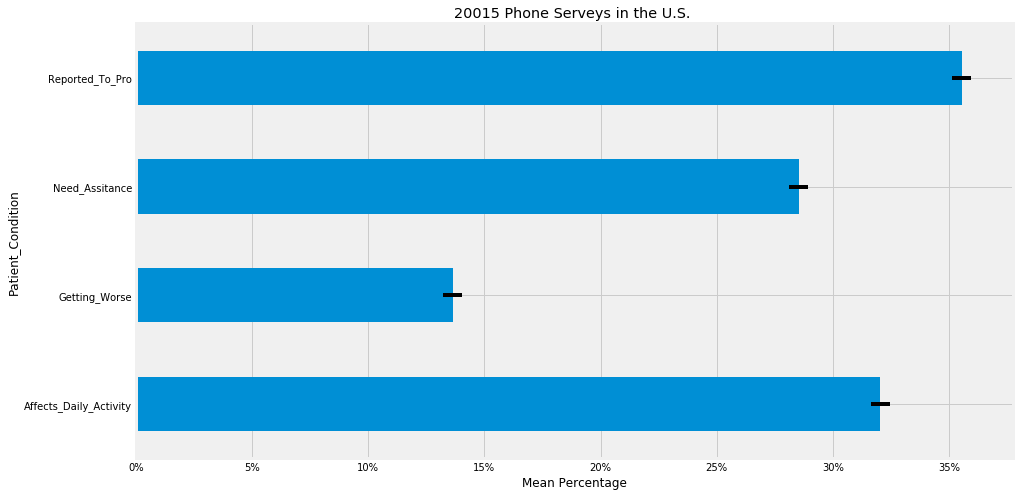

In [23]:
from matplotlib.ticker import FuncFormatter
from scipy import stats

# Compute Standard Error for the mean
xerr = stats.sem(cognitive_df_15.Percentages.values)

# Xtick Formatter


def percent(x, pos):
    'Takes the value and its tick position'
    return '{}%'.format(int(x))


# Plot
fig, ax = plt.subplots(figsize=(14, 8))
cognitive_df_15[['Patient_Condition', 'Percentages']].groupby('Patient_Condition', as_index=False).mean().plot(kind='barh',
                                                                                                               x='Patient_Condition',
                                                                                                               ax=ax,
                                                                                                               xerr=xerr,
                                                                                                               legend=False)


formatter = FuncFormatter(percent)
ax.xaxis.set_major_formatter(formatter)
ax.set(title='20015 Phone Serveys in the U.S. ', xlabel='Mean Percentage');
plt.savefig('2015Survey.png')

> Average percentages show that Cognitive health issues are affecting patients' life condition severely. About 30 % of the patients need assistance to take care of daily activities while 32 % reports considerable effects of SCD. 

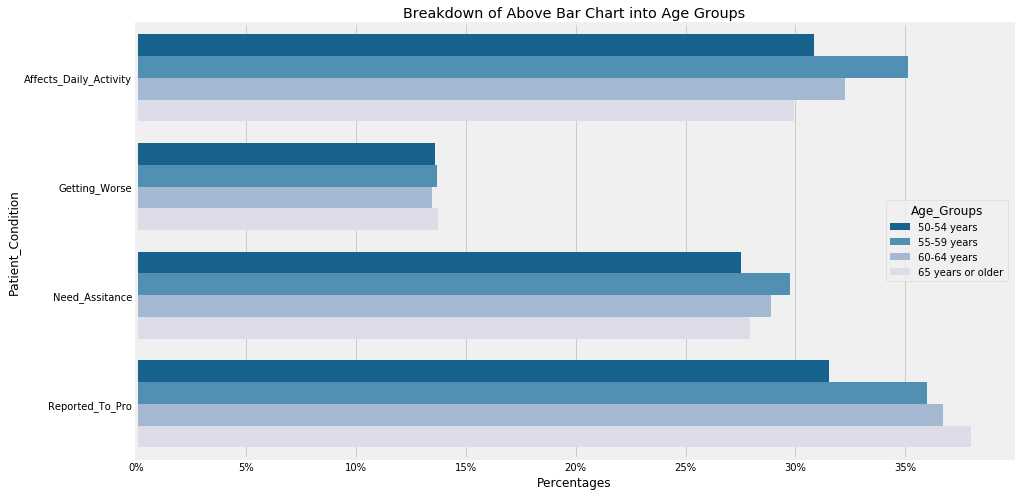

In [26]:
data_ages = cognitive_df_15[['Age_Groups', 'Patient_Condition', 'Percentages']].groupby(
    ['Patient_Condition', 'Age_Groups'], as_index=False)['Percentages'].mean()

fig, ax = plt.subplots(figsize=(14,8))
sns.catplot(x='Percentages',y='Patient_Condition', hue='Age_Groups',
            data=data_ages, kind='bar', palette='PuBu_r', orient='h', ax=ax);
formatter = FuncFormatter(percent)
ax.xaxis.set_major_formatter(formatter)
ax.set_title('Breakdown of Above Bar Chart into Age Groups');
plt.close()
plt.savefig('BreakDownAgeGroups.png')




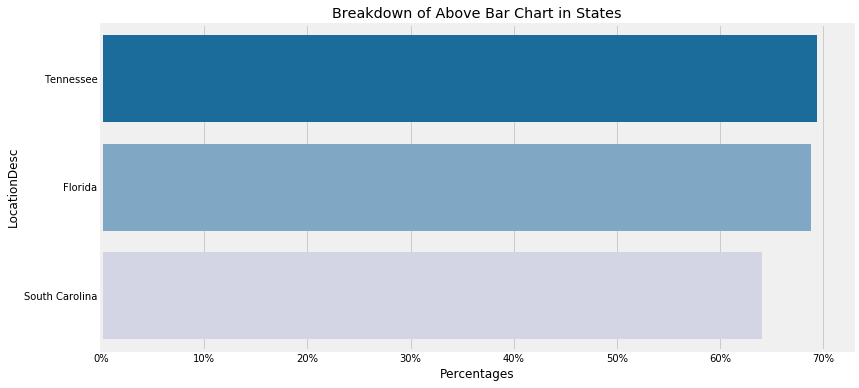

In [38]:
data_states = cognitive_df_15[['LocationDesc', 'Age_Groups', 'Patient_Condition', 'Percentages']].groupby(
    ['LocationDesc','Patient_Condition', 'Age_Groups'], as_index=False)['Percentages'].mean().sort_values(by='Percentages', ascending=False)[:3]

fig, ax = plt.subplots(figsize=(12,6))
sns.catplot(x='Percentages',y='LocationDesc',
            data=data_states, palette='PuBu_r',kind='bar', ax=ax);
formatter = FuncFormatter(percent)
ax.xaxis.set_major_formatter(formatter)
ax.set_title('Breakdown of Above Bar Chart in States');
plt.close()
plt.savefig('BreakdownIntoStates.png')

In [25]:
dff = cognitive_df_15[['LocationDesc','Age_Groups', 'Patient_Condition', 'Percentages']]
dff['Mean_Sorted'] = dff.groupby(['LocationDesc', 'Age_Groups'])['Percentages'].transform(lambda x: x.mean()).sort_values(ascending=False)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
dff2 = dff.groupby('LocationDesc').apply(lambda x: (x.groupby('Age_Groups')
                                      .mean()
                                      .sort_values('Percentages', ascending=False)))
dff2 = dff2.drop('Mean_Sorted', axis=1)
dff2

Percentages
LocationDesc  Age_Groups                    
Alabama       55-59 years           43.27500
              50-54 years           39.62500
              60-64 years           39.32500
              65 years or older     31.82500
Alaska        65 years or older     27.92250
              60-64 years           12.20000
              55-59 years           11.20000
              50-54 years            8.70000
Arizona       55-59 years           39.77500
              50-54 years           35.25000
              60-64 years           32.87500
              65 years or older     25.52500
Arkansas      50-54 years           41.27500
              60-64 years           37.55000
              55-59 years           32.60000
              65 years or older     27.90000
California    65 years or older     25.67500
              55-59 years           12.80000
              50-54 years           11.00000
              60-64 years            8.60000
Colorado      50-54 years           35.40000
              55-59 years           35.00000
              60-64 years           27.15000
              65 years or older     23.50000
Connecticut   65 years or older     26.15000
              55-59 years            7.10000
              60-64 years            6.80000
              50-54 years            6.50000
Delaware      65 years or older     28.15000
              55-59 years            9.60000
...                                      ...
Texas         65 years or older     32.95000
              60-64 years           31.05000
Utah          55-59 years           39.13750
              50-54 years           32.92000
              60-64 years           26.31750
              65 years or older     21.70000
Vermont       55-59 years           32.30000
              50-54 years           30.86875
              60-64 years           30.30000
              65 years or older     27.40000
Virginia      55-59 years           36.35000
              60-64 years           33.32500
              50-54 years           32.67500
              65 years or older     27.37500
Washington    55-59 years           31.80000
              50-54 years           29.62250
              60-64 years           27.47750
              65 years or older     26.07750
West Virginia 50-54 years           38.90000
              55-59 years           33.12500
              65 years or older     32.05000
              60-64 years           31.57500
Wisconsin     60-64 years           33.60000
              55-59 years           27.05000
              65 years or older     24.40000
              50-54 years            9.10000
Wyoming       55-59 years           30.33250
              60-64 years           24.50000
              65 years or older     20.97500
              50-54 years           10.50000

[204 rows x 1 columns]

In [27]:
dff_20 = dff.sort_values('Mean_Sorted', ascending=False)[:20]

/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


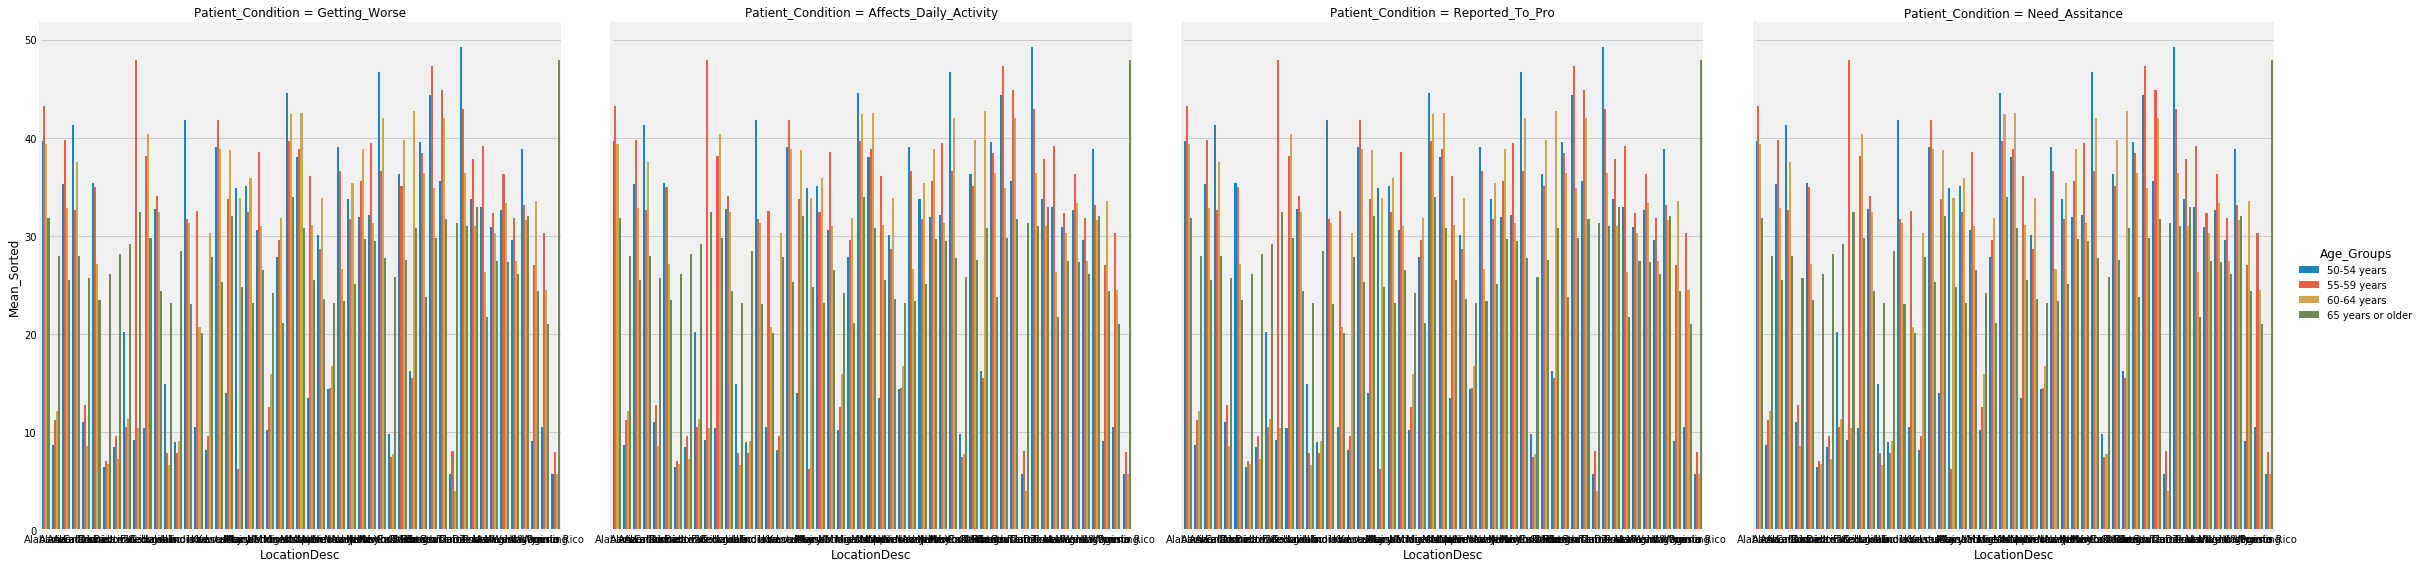

In [28]:
sns.catplot(x='LocationDesc',y='Mean_Sorted', hue='Age_Groups',col='Patient_Condition', kind='bar', data=dff, height=8)